## **ANÁLISIS DEL CO EN EL AIRE DE BOGOTÁ EMPLEANDO SERIES DE TIEMPO**


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pip install pyramid-arima

In [0]:

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

## Cargar dataset


In [0]:
aire="/content/drive/My Drive/Colab Notebooks/DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2017.csv"
data = pd.read_csv(aire)

In [0]:
#aire="/content/drive/My Drive/Colab Notebooks/DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2017.csv"
#data = pd.read_csv(aire)


In [0]:
d1=data.copy()

In [0]:
data.head()

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
0,09/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,55.57,"(6.436, -75.333431)"
1,13/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,30.81,"(6.436, -75.333431)"
2,15/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,21.01,"(6.436, -75.333431)"
3,18/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,30.73,"(6.436, -75.333431)"
4,20/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,24.72,"(6.436, -75.333431)"


In [0]:
v=data["Variable"].unique()
(v,len(v))

(array(['PM10', 'Dirección del Viento', 'O3', 'Humedad Relativa 10 m',
        'Humedad Relativa 2 m', 'Presión Atmosférica',
        'Precipitación Líquida', 'Radiación Solar Global',
        'Temperatura a 10 m', 'Temperatura a 2 m', 'Velocidad del Viento',
        'PM2.5', 'NO', 'NO2', 'CO', 'PST', 'Temperatura', 'SO2',
        'Humedad Relativa', 'Radiación UVB'], dtype=object), 20)

In [0]:
v=d1["Nombre del municipio"].unique()
(v,len(v))

(array(['BARBOSA', 'BELLO', 'CALDAS', 'MEDELLÍN', 'COPACABANA', 'ENVIGADO',
        'LA ESTRELLA', 'SABANETA', 'GIRARDOTA', 'ITAGÜÍ', 'NEIVA',
        'BOGOTÁ. D.C.', 'CAJICÁ', 'COGUA', 'FUNZA', 'LA CALERA', 'MADRID',
        'MOSQUERA', 'NEMOCÓN', 'RÁQUIRA', 'SIBATÉ', 'SOACHA', 'SOPÓ',
        'TAUSA', 'TOCANCIPÁ', 'ZIPAQUIRÁ', 'DOSQUEBRADAS', 'LA VIRGINIA',
        'PEREIRA', 'SANTA ROSA DE CABAL', 'BUCARAMANGA', 'FLORIDABLANCA',
        'QUIBDÓ', 'AMAGÁ', 'AMALFI', 'ANDES', 'ANGELÓPOLIS', 'ANGOSTURA',
        'ANORÍ', 'ANZÁ', 'ARMENIA', 'BELMIRA', 'BETANIA', 'BETULIA',
        'BRICEÑO', 'BURITICÁ', 'CÁCERES', 'CAICEDO', 'CAMPAMENTO',
        'CARACOLÍ', 'CAROLINA', 'CISNEROS', 'CIUDAD BOLÍVAR', 'CONCORDIA',
        'EBÉJICO', 'GUADALUPE', 'DONMATÍAS', 'EL BAGRE', 'ENTRERRÍOS',
        'FREDONIA', 'GÓMEZ PLATA', 'HELICONIA', 'HISPANIA', 'ITUANGO',
        'JARDÍN', 'LA PINTADA', 'PUERTO NARE', 'LIBORINA', 'MACEO',
        'MONTEBELLO', 'NECHÍ', 'OLAYA', 'PUEBLORRICO', 'PUERTO BERRÍO

In [0]:
v=d1["Tipo de estación"].unique()
(v,len(v))

(array(['Fija', 'Indicativa'], dtype=object), 2)

In [0]:
v=d1["Autoridad Ambiental"].unique()
(v,len(v))

(array(['AMVA', 'CAM', 'CAR', 'CARDER', 'CDMB', 'CODECHOCÓ',
        'CORANTIOQUIA', 'CORMACARENA', 'CORNARE', 'CORPAMAG',
        'CORPOBOYACA', 'CORPOCALDAS', 'CORPOCESAR', 'CORPOGUAJIRA',
        'CORPONARIÑO', 'CORPONOR', 'CORPORINOQUIA', 'CORTOLIMA', 'CRA',
        'CRC', 'CRQ', 'CVC', 'CVS', 'DAGMA', 'EPA Barranquilla Verde',
        'EPA Cartagena', 'SDA'], dtype=object), 27)

## Seleccion y filtrado de datos

In [0]:
d1[d1["Nombre del municipio"]=="BOGOTÁ. D.C."].head()

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
4832167,04/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,48.52,"(4.530213886, -74.14221714)"
4832168,06/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,40.13,"(4.530213886, -74.14221714)"
4832169,10/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,51.36,"(4.530213886, -74.14221714)"
4832170,14/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,57.20,"(4.530213886, -74.14221714)"
4832171,17/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,35.41,"(4.530213886, -74.14221714)"


In [0]:
Ciudad=d1[(d1["Nombre del municipio"]=="BOGOTÁ. D.C.")  & (d1["Variable"]=="CO")]
Ciudad.head()


,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
9483095,01/01/2011 01:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,345.753970,"(4.658467, -74.083967)"
9483096,01/01/2011 02:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,316.750364,"(4.658467, -74.083967)"
9483097,01/01/2011 03:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,286.220174,"(4.658467, -74.083967)"
9483098,01/01/2011 04:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,423.605857,"(4.658467, -74.083967)"
9483099,01/01/2011 05:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,616.327403,"(4.658467, -74.083967)"


## Edicion de la fecha


In [0]:

t=Ciudad["Fecha"].str[-14:]
for n in t.index:
  if t[n][-6:]==" a. m.":
    t[n]=t[n][:-6]
  else:
    f=t[n][:2]
    f1=str(int(f)+12)
    if f1=="24":
      f1="00"
    t[n]=f1+t[n][2:-6]

t=Ciudad["Fecha"].str[:-14]+t
Ciudad["Fecha"]=t
Ciudadf=Ciudad
#Ciudadf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
Ciudadf['Nombre de la estación'].unique()

array(['C. Alto Rendimiento', 'Carvajal - Sevillana', 'Fontibón',
       'Kennedy', 'Las Ferias', 'Puente Aranda', 'San Cristóbal', 'Tunal',
       'Usaquén'], dtype=object)

In [0]:
for j in Ciudad["Fecha"].str[-13:-9].unique():
  t1=Ciudad[Ciudad["Fecha"].str[-13:-9]==j]
  print(j)
  vec=np.array([])
  for i in t1["Fecha"].str[-16:-14].unique():
    t=Ciudad[Ciudad["Fecha"].str[-16:-9]==(i+"/"+j)]
    vec=np.append(vec,[len(t["Fecha"].str[:-9].unique())])
  print(vec)

2011
[31. 28. 31. 30. 31. 30. 31. 30. 31. 30. 31. 31.]
2012
[31. 29. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]
2013
[31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]
2014
[31. 28. 31. 30. 31. 31. 30. 31. 30. 31. 31. 30.]
2015
[31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]
2016
[31. 29. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]
2017
[31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]


In [0]:
Ciudadf=Ciudadf.iloc[:,[0,14]]

In [0]:
Ciudadf["Fecha"].str[-19:-9]

9483095     01/01/2011
9483096     01/01/2011
9483097     01/01/2011
9483098     01/01/2011
9483099     01/01/2011
               ...    
15318086    31/12/2017
15318087    31/12/2017
15318088    31/12/2017
15318089    31/12/2017
15318090    31/12/2017
Name: Fecha, Length: 384697, dtype: object

In [0]:
Fecha=np.array([])
Concentracion=np.array([])
for j in Ciudadf["Fecha"].str[-19:-9].unique():
  t=Ciudadf[Ciudadf["Fecha"].str[-19:-9]==j]
  Fecha=np.append(Fecha,j)
  Concentracion=np.append(Concentracion, round(np.mean(t)))
  #print(j)

In [0]:
CiudadF2=pd.DataFrame({"Fecha": Fecha, "Concentracion": Concentracion})
CiudadF2.head()
CiudadF3=CiudadF2.copy()
#CiudadF2.shape


In [0]:
CiudadF2["Fecha"] = pd.to_datetime(CiudadF2["Fecha"], format="%d/%m/%Y")
#check datatype of index

In [0]:
CiudadF2.head()

,Fecha,Concentracion
0,2011-01-01,684.0
1,2011-01-02,602.0
2,2011-01-03,1198.0
3,2011-01-04,1528.0
4,2011-01-05,1085.0


## Cambio de indice diario


In [0]:
CiudadF2.set_index('Fecha', inplace=True)
CiudadF2=CiudadF2.sort_index()
CiudadF2.head()

,Concentracion
Fecha,
2011-01-01,684.0
2011-01-02,602.0
2011-01-03,1198.0
2011-01-04,1528.0
2011-01-05,1085.0


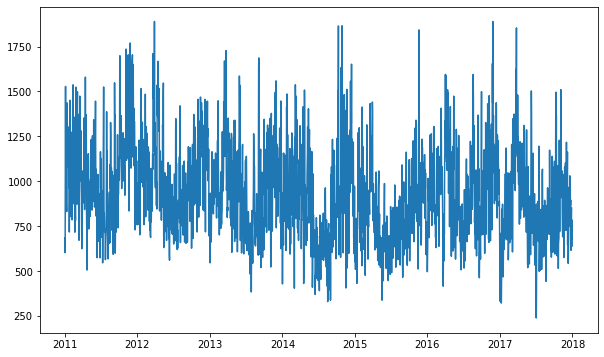

In [0]:
plt.plot(CiudadF2)

## arima diario



In [0]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    ## Prueba de Dickey-fuller: esta es una de las pruebas estadísticas para verificar la estacionariedad. 
    #Primero consideramos la hipótesis nula: la serie temporal no es estacionaria. 
    #El resultado del resto contendrá la estadística de prueba y el valor crítico para diferentes niveles de 
    #confianza. La idea es tener estadísticas de prueba inferiores al valor crítico, en este caso podemos rechazar 
    #la hipótesis nula y decir que esta serie de tiempo es estacionaria
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

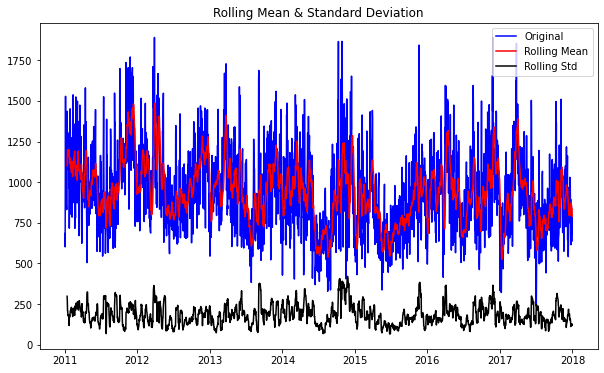

Results of Dickey-Fuller Test:
Test Statistic                   -4.852693
p-value                           0.000043
#Lags Used                       27.000000
Number of Observations Used    2529.000000
Critical Value (1%)              -3.432938
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


In [0]:

tsd=CiudadF2.iloc[:,0]
test_stationarity(tsd)

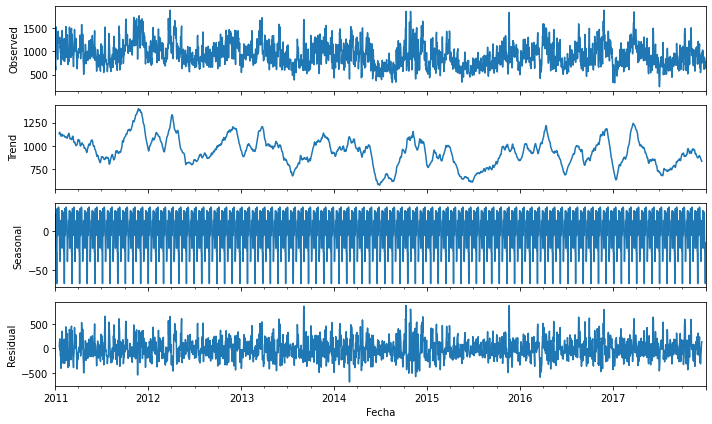

In [0]:
descomposicion = sm.tsa.seasonal_decompose(tsd,model='additive', freq=30)  
fig = descomposicion.plot()

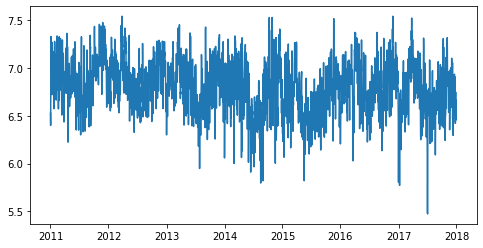

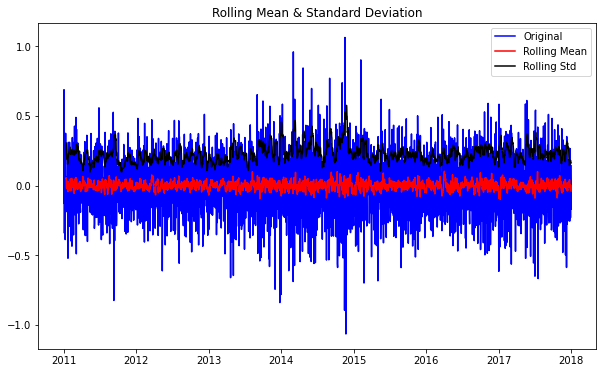

Results of Dickey-Fuller Test:
Test Statistic                -1.401643e+01
p-value                        3.635867e-26
#Lags Used                     2.700000e+01
Number of Observations Used    2.528000e+03
Critical Value (1%)           -3.432939e+00
Critical Value (5%)           -2.862684e+00
Critical Value (10%)          -2.567379e+00
dtype: float64


In [0]:
tsd_log = np.log(tsd)
plt.figure(figsize=(8,4))
plt.plot(tsd_log)
plt.figure()
tsd_log_diff_shifting = tsd_log - tsd_log.shift()
tsd_log_diff_shifting.dropna(inplace=True)
test_stationarity(tsd_log_diff_shifting)

Fecha
2011-01-12    0.303347
2011-01-13    0.120960
2011-01-14   -0.002261
2011-01-15    0.031353
2011-01-16    0.019596
Name: Concentracion, dtype: float64

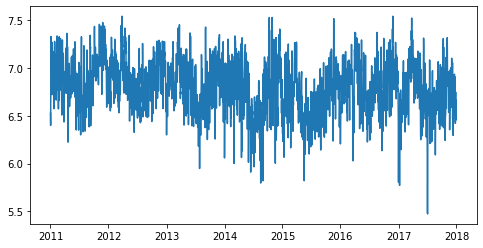

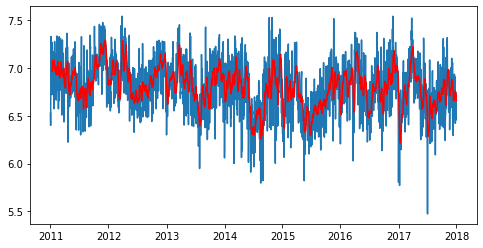

<Figure size 576x288 with 0 Axes>

In [0]:
tsd_log = np.log(tsd)
plt.figure(figsize=(8,4))
plt.plot(tsd_log)


rolmean = tsd_log.rolling(window=12).mean() 
plt.figure(figsize = (8,4))
plt.plot(tsd_log)
plt.plot(rolmean, 'red')


plt.figure(figsize = (8,4))
tsd_log_rolmean_diff = tsd_log- rolmean
tsd_log_rolmean_diff.head(13)



tsd_log_rolmean_diff.dropna(inplace=True)
tsd_log_rolmean_diff.head()


In [0]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(tsd, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=34041.594, BIC=34070.801, Fit time=34.319 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=36323.329, BIC=36335.012, Fit time=0.231 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=35468.838, BIC=35492.204, Fit time=10.309 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=34295.283, BIC=34318.649, Fit time=13.409 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=33962.715, BIC=33997.764, Fit time=42.115 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=34936.648, BIC=34965.856, Fit time=16.472 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=34044.263, BIC=34085.154, Fit time=115.169 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=35683.217, BIC=35706.583, Fit time=3.033 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=34047.395, BIC=34094.127, Fit time=109.316 seconds
F

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


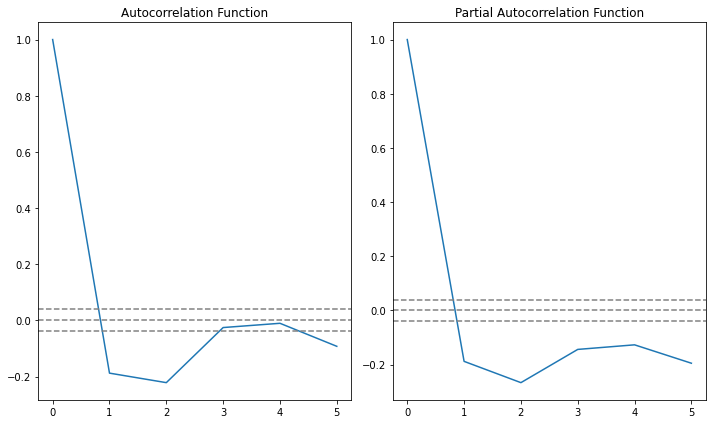

In [0]:
#ACF & PACF plots

lag_acf = acf(tsd_log_diff_shifting, nlags=5)
lag_pacf = pacf(tsd_log_diff_shifting, nlags=5, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsd_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsd_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsd_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsd_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


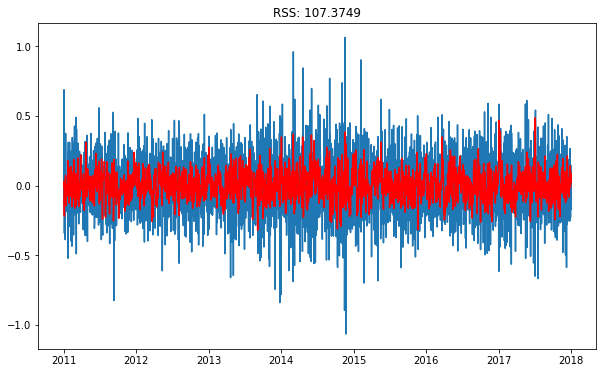

In [0]:
model = ARIMA(tsd_log, order=(1,1,1))
results_AR = model.fit(disp=-1)
plt.plot(tsd_log_diff_shifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - tsd_log_diff_shifting)**2))
print('Plotting AR model')



In [0]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(tsd_log.iloc[0], index=tsd_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

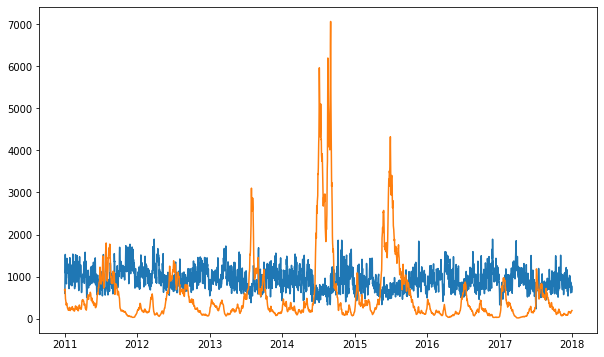

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(tsd)
plt.plot(predictions_ARIMA)

In [0]:
tsd.shape

(2557,)

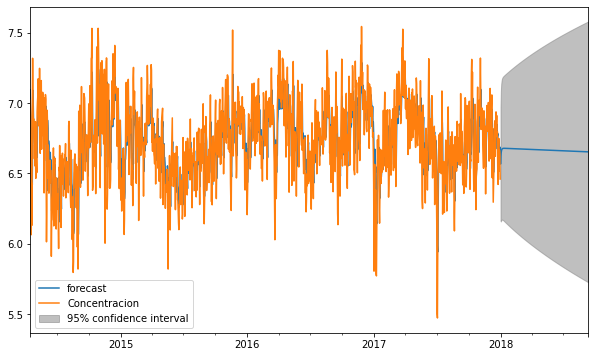

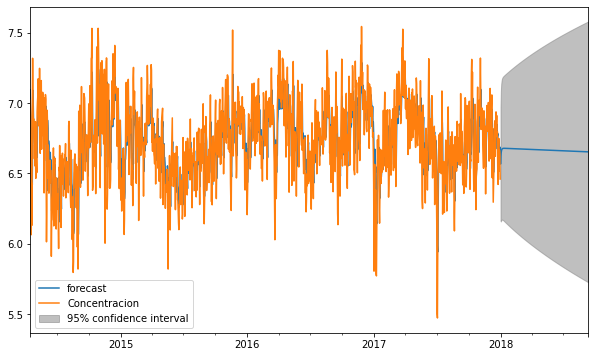

In [0]:
results_AR.plot_predict(1200,2557+253)

## Cambio de indice mensual



In [0]:
CiudadF3.head()
CiudadF4=CiudadF3.copy()

In [0]:
CiudadF3["Fecha"].str[3:5].unique()

array(['01', '02', '03', '04', '05', '06', '08', '09', '10', '11', '12',
       '07'], dtype=object)

In [0]:
Fecha=np.array([])
Concentracion=np.array([])
for j in CiudadF3["Fecha"].str[3:].unique():
  t=CiudadF3[CiudadF3["Fecha"].str[3:]==j]
  Fecha=np.append(Fecha,j)
  Concentracion=np.append(Concentracion, round(np.mean(t)))
  #print(j)

In [0]:
CiudadF3=pd.DataFrame({"Fecha": Fecha, "Concentracion": Concentracion})
CiudadF3.head()


,Fecha,Concentracion
0,01/2011,1124.0
1,02/2011,1094.0
2,03/2011,1033.0
3,04/2011,1036.0
4,05/2011,999.0


In [0]:
CiudadF3["Fecha"] = pd.to_datetime(CiudadF3["Fecha"], format="%m/%Y")
CiudadF3.set_index('Fecha', inplace=True)
CiudadF3=CiudadF3.sort_index()

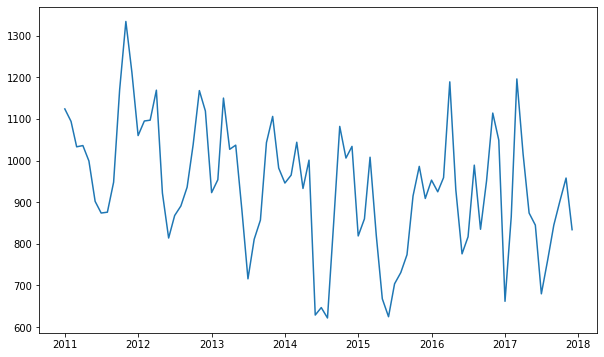

In [0]:
plt.plot(CiudadF3)

## arima mensual



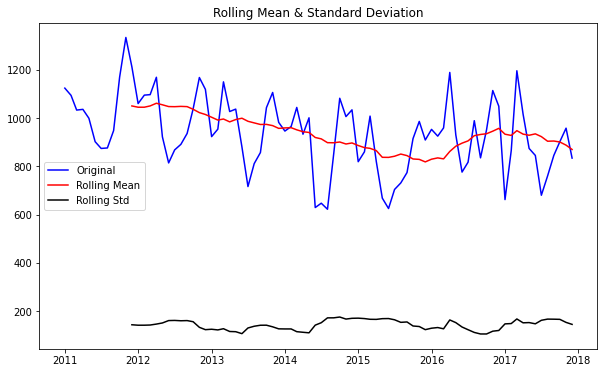

Results of Dickey-Fuller Test:
Test Statistic                 -1.529348
p-value                         0.518947
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [0]:
ts=CiudadF3.iloc[:,0]
test_stationarity(ts)

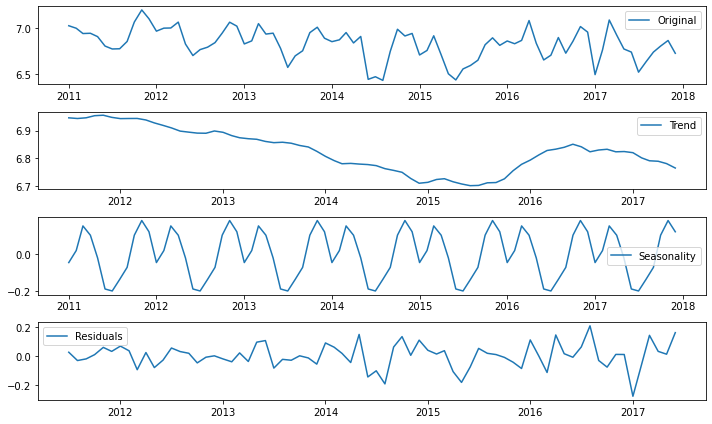

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_log = np.log(ts)
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()


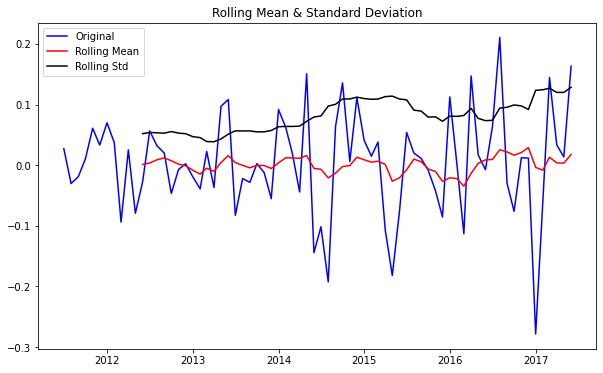

Results of Dickey-Fuller Test:
Test Statistic                -6.045660e+00
p-value                        1.313779e-07
#Lags Used                     5.000000e+00
Number of Observations Used    6.600000e+01
Critical Value (1%)           -3.533560e+00
Critical Value (5%)           -2.906444e+00
Critical Value (10%)          -2.590724e+00
dtype: float64


In [0]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


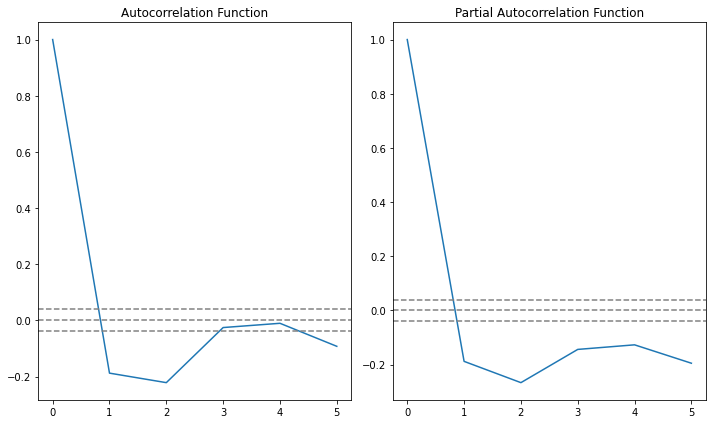

In [0]:
#ACF & PACF plots

lag_acf = acf(ts_log_diff_shifting, nlags=5)
lag_pacf = pacf(ts_log_diff_shifting, nlags=5, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


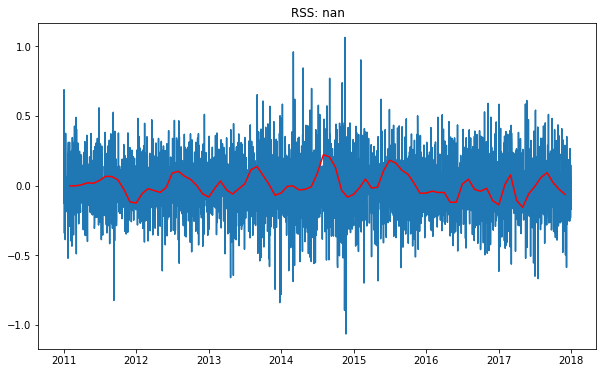

In [0]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff_shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - ts_log_diff_shifting)**2))
print('Plotting AR model')



In [0]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

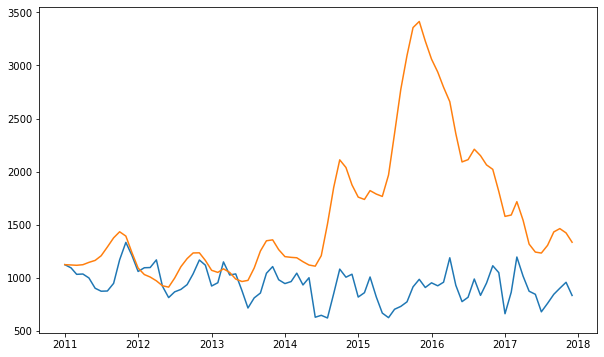

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)

In [0]:

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()


predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

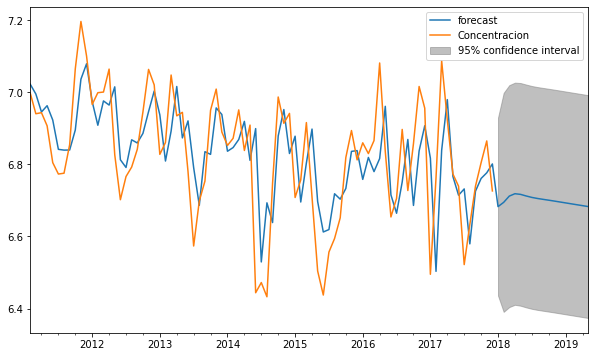

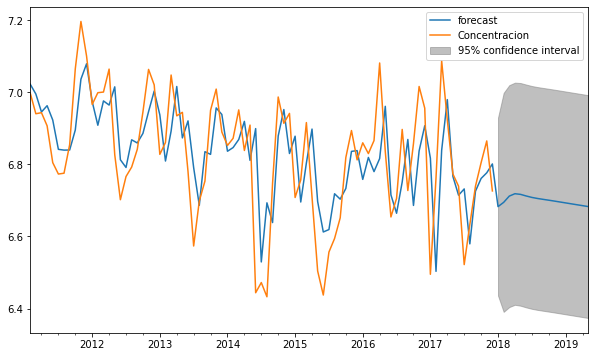

In [0]:
results_ARIMA.plot_predict(1,100)

**Conclusión:** 




##Holt winter dias




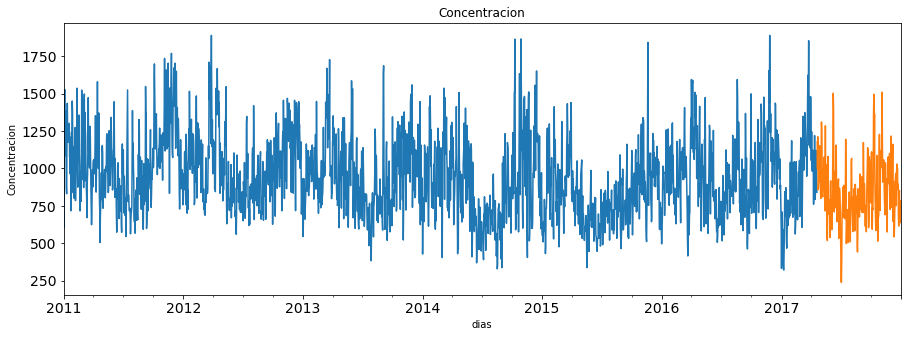

In [0]:
size=int(tsd.shape[0]*0.9)
train=tsd[:size]
test=tsd[size:]
train.plot(kind='line',figsize=(15,8), title= 'Concentracion', fontsize=14)
test.plot(figsize=(15,5), title= 'Concentracion', fontsize=14)
plt.ylabel('Concentracion')
plt.xlabel('dias')
plt.show()

Time shifting

In [0]:
train_shif=np.log(train)-np.log(train).shift()
n=np.log(test)-np.log(test).shift()

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(np.asarray(train_shif.dropna()) ,seasonal_periods=6 ,trend='add', seasonal='add',).fit()
y_hat_avg= pd.DataFrame(fit1.forecast(len(test)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [0]:
t=y_hat_avg.set_index(tsd[size:].index)
predict=pd.Series(t[0])

print(predict)

Fecha
2017-04-20   -0.017317
2017-04-21   -0.040905
2017-04-22    0.012967
2017-04-23   -0.012193
2017-04-24   -0.005654
                ...   
2017-12-27   -0.299244
2017-12-28   -0.249578
2017-12-29   -0.273166
2017-12-30   -0.219294
2017-12-31   -0.244454
Name: 0, Length: 256, dtype: float64


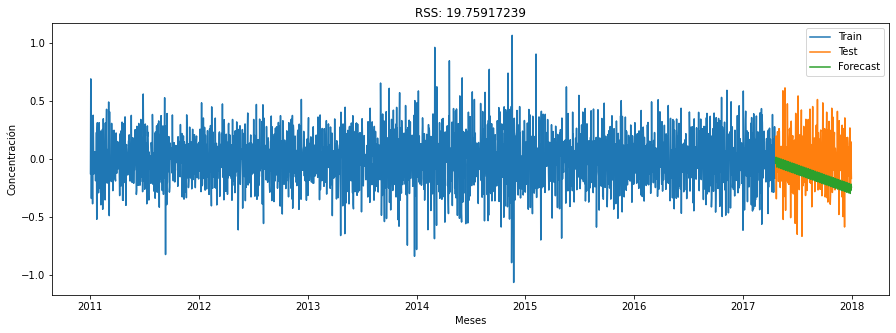

In [0]:
plt.figure(figsize=(15,5))
plt.plot(train_shif, label='Train')
plt.plot(n, label='Test')
plt.plot(predict, label='Forecast')

plt.legend(loc='best')

plt.title('RSS: %.8f'%sum((predict[1:] - n[1:])**2))

plt.ylabel('Concentración')
plt.xlabel('Meses')
plt.show()

##Holt winter meses



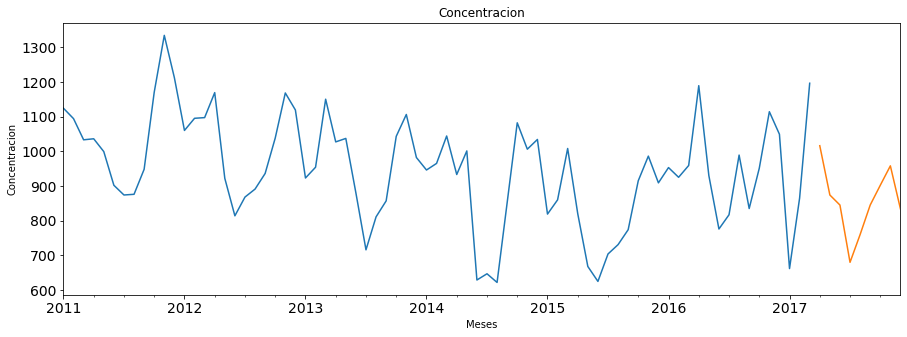

In [0]:
size=int(ts.shape[0]*0.9)
train=ts[:size]
test=ts[size:]
train.plot(kind='line',figsize=(15,8), title= 'Concentracion', fontsize=14)
test.plot(figsize=(15,5), title= 'Concentracion', fontsize=14)
plt.ylabel('Concentracion')
plt.xlabel('Meses')
plt.show()

Time shifting

In [0]:
train_shif=np.log(train)-np.log(train).shift()
n=np.log(test)-np.log(test).shift()

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(np.asarray(train_shif.dropna()) ,seasonal_periods=6 ,trend='add', seasonal='add',).fit()
y_hat_avg= pd.DataFrame(fit1.forecast(len(test)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [0]:
t=y_hat_avg.set_index(ts[size:].index)
predict=pd.Series(t[0])

print(predict)

Fecha
2017-04-01    0.106542
2017-05-01    0.021454
2017-06-01   -0.067722
2017-07-01   -0.023341
2017-08-01    0.112319
2017-09-01    0.089268
2017-10-01    0.123499
2017-11-01    0.038411
2017-12-01   -0.050765
Name: 0, dtype: float64


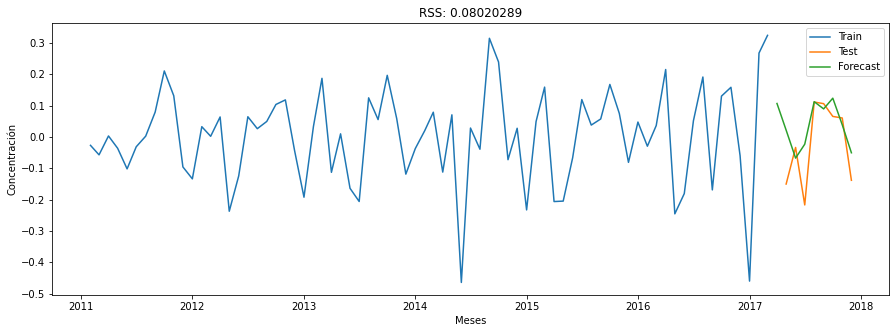

In [0]:
plt.figure(figsize=(15,5))
plt.plot(train_shif, label='Train')
plt.plot(n, label='Test')
plt.plot(predict, label='Forecast')

plt.legend(loc='best')

plt.title('RSS: %.8f'%sum((predict[1:] - n[1:])**2))

plt.ylabel('Concentración')
plt.xlabel('Meses')
plt.show()